## Import 

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(10,10)

## Mean 

In [282]:
x = np.random.randint(1, 10, 5)
print(x)
print('mean: ', np.mean(x))

[2 8 2 4 4]
mean: 4.0


## Variance

In [284]:
print('variance: ',np.var(x))

variance:  4.8


## Deviation

In [285]:
x = np.random.randint(1, 10, 10)
y = np.random.randint(11, 20, 10)
print('deviation: ', x-np.mean(x))
print('deviation: ', y-np.mean(y))

deviation:  [-4.  1. -3.  3.  1.  1.  2.  3. -1. -3.]
deviation:  [-1.5 -2.5  3.5  0.5 -2.5 -2.5 -0.5  4.5  4.5 -3.5]


## Covariance 

In [287]:
#deviation x
dx=x-np.mean(x)
dy=y-np.mean(y)
print('covariation: ',np.mean(dx*dy))

covariation:  0.8


## Correlation 

In [289]:
#normalization x
zx=dx/np.std(x)
zy=dy/np.std(y)
print('correlation: ',round(np.mean(zx*zy),2))

correlation:  0.11


##  MSE (均方差)
MSE= Mean Squared Error

$$ Mean(Square(Predict-True))$$

$$ Var(Predict-True)$$

In [118]:
x = np.linspace(0, 100, 11)
y = np.array([10, 15, 39, 57, 56, 78, 95, 103, 110, 137, 150])
df=pd.DataFrame({'x':x,'y':y})

model_fit=ols('y~x',data=df).fit()
y_predict=model_fit.predict(df)

residual=y_predict-y

print('mse: ',round(np.mean(np.square(residual)),2))

mse:  27.24


In [117]:
from sklearn.metrics import mean_squared_error
print('mse: ',round(mean_squared_error(y_predict,y),2))

mse:  27.24


In [126]:
print('mse: ',round(np.var(residual),2))

mse:  27.24


## RMSE 
RMSE=Root Mean Squared Error

$$ 求residual的標準差$$

$$ RMSE=Sqrt(Mean(Square(Predict-True)))$$

$$ RMSE=Std(Predict-True)$$

In [122]:
residual=y_predict-y
print('RMSE: ', round(np.sqrt(np.mean(np.square(residual))),2))

print('RMSE: ', round(np.std(residual),2))

RMSE:  5.22
RMSE:  5.22


In [124]:
print('RMSE: ',round(np.sqrt(mean_squared_error(y_predict,y)),2))

RMSE:  5.22


## R-Squared

Deviation
$$ Mean(True)-True$$

$$ VAR= Sum(Square(Deviation))$$

Residuals
$$ Predict-True$$

$$ RSS= Sum(Square(Residuals))$$

R-Squared
$$ R-Squared = 1-\frac{RSS}{VAR}$$

In [133]:
deviation=np.mean(y)-y
var=np.sum(np.square(deviation))

residual=y_predict-y
rss=np.sum(np.square(residual))

r_squared=1-rss/var
print('R-Squared: ',round(r_squared,2))

R-Squared:  0.99


In [138]:
print('R-Squared: ',round(model_fit.rsquared,2))

R-Squared:  0.99


In [136]:
#R^2 (coefficient of determination) regression score function.
from sklearn.metrics import r2_score
print('R-Squared:',round(r2_score(y_predict,y),2))

R-Squared: 0.99


## Confidence level 

In [49]:
iris=sns.load_dataset('iris')
iris_sepal=iris.groupby('species',as_index=False).aggregate({'sepal_length':[np.mean,np.std]})
iris_sepal.columns=iris_sepal.columns.droplevel()
iris_sepal.eval('lower=mean-1.96*std',inplace=True)
iris_sepal.eval('higher=mean+1.96*std',inplace=True)
iris_sepal['y']=['95% interval']*3

In [63]:
iris_sepal

,,mean,std,lower,higher,y
0,setosa,5.006,0.352490,4.315120,5.696880,95% interval
1,versicolor,5.936,0.516171,4.924305,6.947695,95% interval
2,virginica,6.588,0.635880,5.341676,7.834324,95% interval


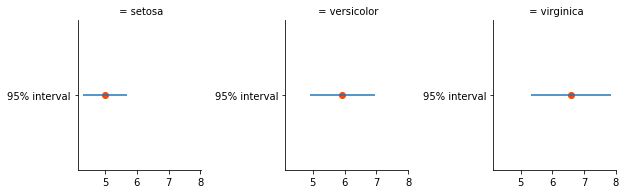

In [149]:
g = sns.FacetGrid(data=iris_sepal, col='', sharey=False)
g.map(plt.hlines, 'y', 'lower', 'higher')
g.map(plt.scatter,'mean','y',color='orangered').set_ylabels('').set_xlabels('')

Text(0.5, 0, '95% confidence')

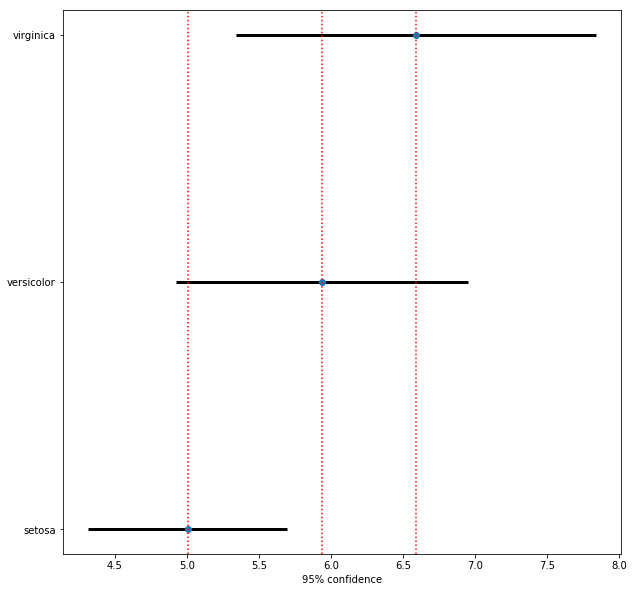

In [147]:
plt.hlines(data=iris_sepal, y='', xmin='lower', xmax='higher', linewidth=3)
plt.plot('mean', '', 'o', data=iris_sepal)
for i,name in iris_sepal.iterrows():
    plt.axvline(x=name['mean'],c='red',linestyle=':')
plt.xlabel('95% confidence')

## Confience interval 

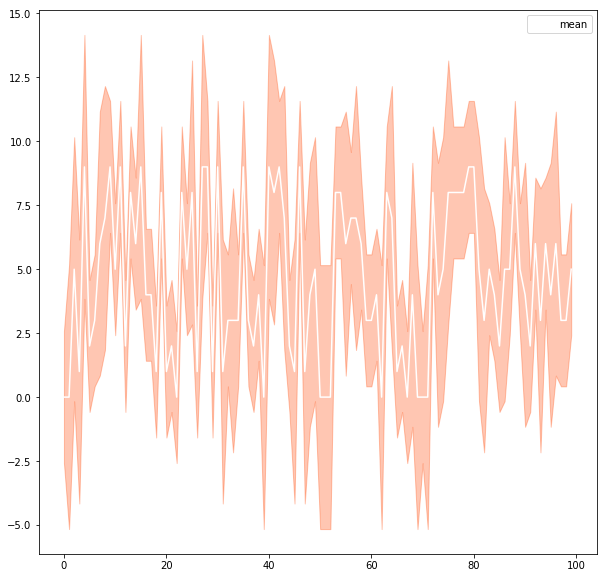

In [199]:
df = pd.DataFrame({'date': np.arange(100), 'mean': np.random.randint(
    0, 10, 100), 'std_err': np.random.randint(1, 3, 100)})
df.eval('lower=mean-2.58*std_err', inplace=True)
df.eval('higher=mean+2.58*std_err', inplace=True)

df.plot(y='mean', color='white')

plt.fill_between(x='date', y1='lower', y2='higher',
                 color='orangered', data=df, alpha=0.3)

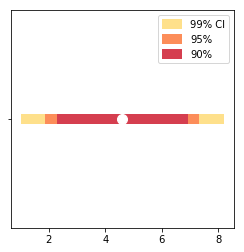

In [200]:
z = [2.58,  1.96, 1.67]
widths = ['99% CI', '95%', '90%']
colors = ['#fee08b', '#fc8d59', '#d53e4f']

plt.figure(figsize=(4, 4))
for value, width, color in zip(z, widths, colors):
    plt.hlines(y='', xmin=df['mean'].mean()-value*df['std_err'].mean(), xmax=df['mean'].mean() +
               value*df['std_err'].mean(), color=color, linewidth=10, label=width)
plt.plot(df['mean'].mean(),0,'wo',markersize=10)
plt.legend()

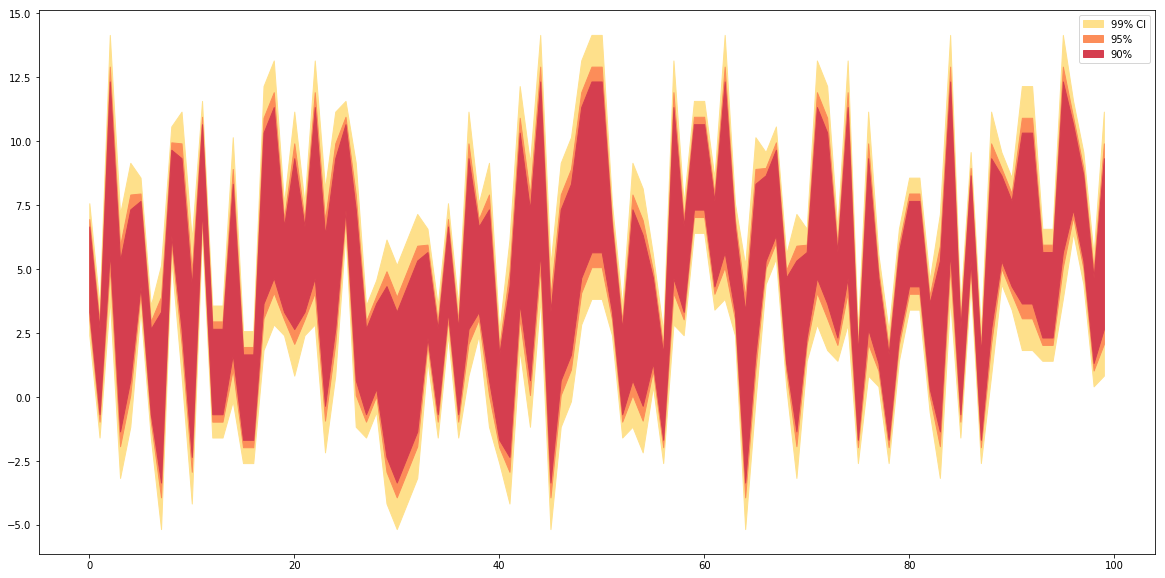

In [196]:
plt.figure(figsize=(20, 10))
for value, width, color in zip(z, widths, colors):
    plt.fill_between(x=df['date'], y1=df['mean']-value*df['std_err'],
                     y2=df['mean']+value*df['std_err'], color=color, label=width)
plt.legend()

## bootstrap
隨機抽取一定程度的可放回樣本 記錄下每個樣本的平均值

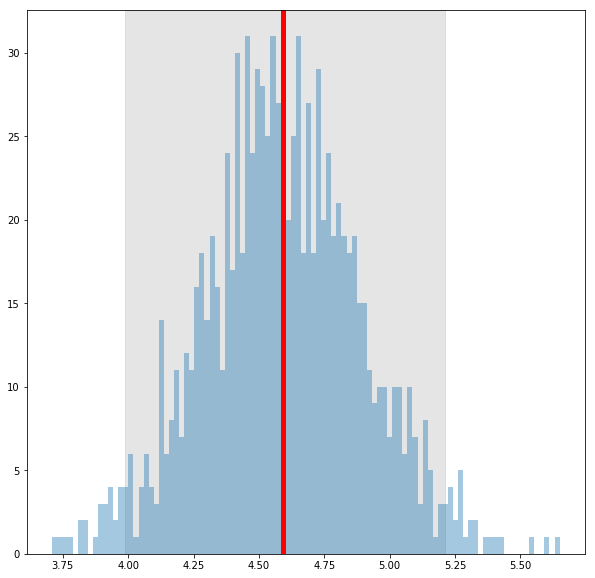

In [204]:
def bootstrap(data, n_boots):
    return [np.mean(np.random.choice(data, len(data), replace=True)) for _ in range(n_boots)]


boot_means = bootstrap(df['mean'], 1000)
lower, higher = np.percentile(boot_means, [2.5, 97.5])
plt.axvspan(lower, higher, alpha=0.2, color='gray')
sns.distplot(boot_means, bins=100, kde=False)
plt.axvline(x=np.mean(boot_means),color='red',linewidth=5)

## Sample Statistics

In [141]:
x = np.random.randint(0, 200, 5000)
print('mean {:.1f}, stdev {:.2f}'.format(x.mean(), x.std()))

sample = np.random.choice(x, 500)
print('mean {:.1f}, stdev {:.2f}'.format(sample.mean(), sample.std()))

mean 98.5, stdev 57.31
mean 100.6, stdev 55.25


In [143]:
num_samples=31

means = np.zeros(num_samples)
std = np.zeros(num_samples)

for ns in range(num_samples):
    sample=np.random.choice(x,500)
    means[ns]=np.mean(sample)
    std[ns]=np.std(sample)
    
print("Means:  center={:>6.2f}, spread={:>6.2f}".format(means.mean(), means.std()))
print("Stdevs: center={:>6.2f}, spread={:>6.2f}".format(std.mean(), std.std()))

Means:  center= 97.52, spread=  2.23
Stdevs: center= 57.28, spread=  1.21


/Users/jacky/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


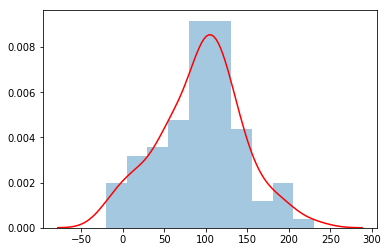

In [150]:
import seaborn as sns
sns.distplot(a=np.random.normal(loc=np.mean(
    sample), scale=np.std(sample), size=100),kde_kws={'color':'red'})

### Likelihood and Probability 
(Probablity)機率　：用於在已知一些參數的情況下，預測接下來的觀測所得到的結果。

(Likelihood)似然性：用於在已知某些觀測所得到的結果時，對有關事物的性質的參數進行估計。

1. L(p_H=1| HH)=1 並不是說,出現正面的機率是1,這只是一個參考值,而這個值只是要告訴你,這個硬幣正面機率為1,比正面機率為0.99的機會大

In [151]:
def gaussian_model(x, mu, sigma):
    coeff_part = 1/(np.sqrt(2 * np.pi * sigma**2)) 
    exp_part = np.exp( - (x - mu)**2 / (2 * sigma**2) ) 
    return coeff_part*exp_part

In [156]:
mu_guess = np.mean(sample)
sigma_guess = np.std(sample)

# For each sample distance, compute the probability modeled by the parameter guesses
probs = np.zeros(len(sample))
for n, distance in enumerate(sample):
    probs[n] = gaussian_model(distance, mu=mu_guess, sigma=sigma_guess)

# Compute and print the log-likelihood as the sum() of the log() of the probabilities
loglikelihood = np.sum(np.log(probs))

print(loglikelihood)

-2727.0077168248918


Maximum loglikelihood found for best mu guess=[95.804]


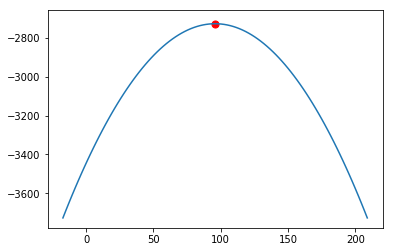

In [191]:
# Create an array of mu guesses, centered on sample_mean, spread out +/- by sample_stdev
low_guess = np.mean(sample) - 2*np.std(sample)
high_guess = np.mean(sample) + 2*np.std(sample)
mu_guesses = np.linspace(low_guess, high_guess, 101)

# Compute the loglikelihood for each model created from each guess value
loglikelihoods = np.zeros(len(mu_guesses))
for n, mu_guess in enumerate(mu_guesses):
    # For each sample distance, compute the probability modeled by the parameter guesses
    probs = np.zeros(len(sample))
    for a, distance in enumerate(sample):
        probs[a] = gaussian_model(distance, mu=mu_guess, sigma=sigma_guess)

    # Compute and print the log-likelihood as the sum() of the log() of the probabilities
    loglikelihood = np.sum(np.log(probs))
    loglikelihoods[n] = loglikelihood

# Find the best guess by using logical indexing, the print and plot the result
best_mu = mu_guesses[loglikelihoods == np.max(loglikelihoods)]
print('Maximum loglikelihood found for best mu guess={}'.format(best_mu))

plt.plot(mu_guesses,loglikelihoods)
plt.scatter(best_mu,loglikelihoods[mu_guesses==best_mu],c='r',s=50)
plt.show()

## Linear Regression 

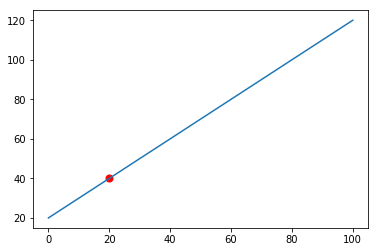

In [38]:
x = [20, 30]
y = [40, 50]
slope = (y[1]-y[0])/(x[1]-x[0])
intercept = y[0]-x[0]*slope

test_data = np.arange(0, 101, 10)
plt.plot(test_data, intercept+slope*test_data)
plt.scatter(x[0], y[0], s=50, c='red')

### Use statsmodels

In [96]:
from statsmodels.formula.api import ols

x = np.linspace(0, 100, 11)
y = np.linspace(100, 200, 11)
df = pd.DataFrame({'x': x, 'y': y})

model_fit = ols(formula='y~x', data=df)
model_fit = model_fit.fit()

In [97]:
print('Intercept', model_fit.params["Intercept"].round(2))
print('Intercept', model_fit.params['x'].round(2))
model_fit.summary()

Intercept 100.0
Intercept 1.0


/Users/jacky/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.961e+31
Date:                Fri, 01 Mar 2019   Prob (F-statistic):          7.78e-138
Time:                        17:08:30   Log-Likelihood:                 330.61
No. Observations:                  11   AIC:                            -657.2
Df Residuals:                       9   BIC:                            -656.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    100.0000   1.34e-14   7.49e+15      0.000     100.000     100.000
x              1.0000   2.26e-16   4.43e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        0.004   Durbin-Watson:                   0.360
Prob(Omnibus):                  0.998   Jarque-Bera (JB):                0.185
Skew:                          -0.034   Prob(JB):                        0.912
Kurtosis:                       2.368   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 找出uncertainty 

In [103]:
x = np.linspace(0, 100, 11)
y = np.array([10, 15, 39, 57, 56, 78, 95, 103, 110, 137, 150])
df = pd.DataFrame({'x': x, 'y': y})
model_fit = ols(formula='y~x', data=df)
model_fit = model_fit.fit()

a0 = model_fit.params['Intercept']
a1 = model_fit.params['x']
"""
standard error for the parameter 參數的標準誤  代表Uncertainty,
不會影響到r-squared, standard error代表資料的隨機性
"""
e0 = model_fit.bse['Intercept']
e1 = model_fit.bse['x']

print('For slope a1={:.02f}, the uncertainty in a1 is {:.02f}'.format(a1, e1))
print('For intercept a0={:.02f}, the uncertainty in a0 is {:.02f}'.format(a0, e0))

For slope a1=1.39, the uncertainty in a1 is 0.06
For intercept a0=7.64, the uncertainty in a0 is 3.25


### Use scikit-learn 

In [104]:
from sklearn.linear_model import LinearRegression

x = np.linspace(0, 100, 11)
y = np.array([10, 15, 39, 57, 56, 78, 95, 103, 110, 137, 150])
df = pd.DataFrame({'x': x, 'y': y})

model = LinearRegression(fit_intercept=True)
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))

print(model.intercept_[0])
print(model.coef_[0, 0])

7.63636363636364
1.3927272727272726


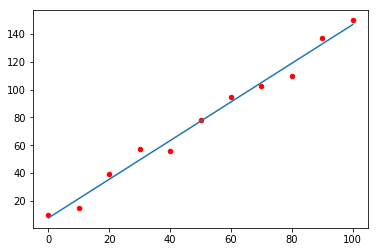

In [105]:
data_predict=model.predict(data.reshape(-1,1))

plt.scatter(x,y,s=20,c='r')
plt.plot(data,data_predict)

### RSS解釋
Residual sum of squares
$$ RSS=sum((y_{pred}-y_{true})^2)$$ 

#### RSS with numpy 

$$a1=\frac{covariance(x,y)}{variance(x)}$$

$$a0=mean(y)-a1*mean(x)$$

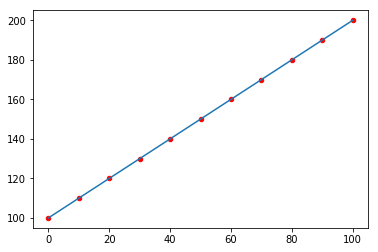

In [66]:
x_mean=np.sum(x)/len(x)
y_mean=np.sum(y)/len(y)
x_dev=x-x_mean
y_dev=y-y_mean

a1=np.sum(x_dev*y_dev)/np.sum(np.square(x_dev))
a0=y_mean-a1*x_mean

plt.scatter(x,y,s=20,c='r')
data=np.linspace(0,100,10001)
plt.plot(data,a0+data*a1)

#### RSS with scipy

intercept:  100.0
slope:  1.0


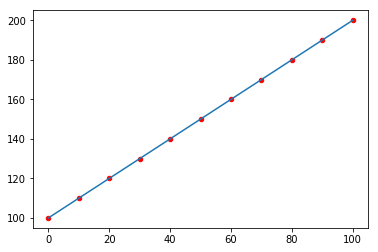

In [74]:
from scipy import optimize

def model_function(x, a0, a1):
    return a0+a1*x

# 將result unpack 並回傳兩個，第一個包含截距和諧律 第二個為covariance
param_opt, param_cov = optimize.curve_fit(model_function, x, y)
a0 = param_opt[0]
a1 = param_opt[1]
print('intercept: ', a0)
print('slope: ', a1)

plt.scatter(x, y, s=20, c='r')
plt.plot(data, a0+a1*data)

#### RSS with statsmodel

100.0
1.0


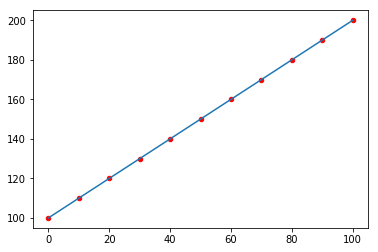

In [82]:
df = pd.DataFrame({'x': x, 'y': y})
model_fit = ols(formula='y~x', data=df).fit()
y_model = model_fit.predict(df)

print(model_fit.params['Intercept'].round(2))
print(model_fit.params['x'].round(2))

plt.scatter(x, y_model, s=20, c='r')
plt.plot(data, model_fit.params['Intercept']+model_fit.params['x']*data)

## 假設檢定 
Type of errors:
1. Measurement error:

ex. broken sensor, wrongly recorded measurements
2. Sampling bias:

ex. temperatures only from August, when days are hottest.
3. Random chance

### 流程

如果為  h0 : uA = uB h1: uA =! uB

1. 先找出樣本統計量np.mean(A) - np.mean(B)

2. 找出檢定統計量 母體平均

3. 計算p-value，雙尾,右尾,左尾分配
$$\frac{np.sum(樣本統計量>檢定統計量)}{樣本數}$$

## Poisson Distribution 
lambda 

In [206]:
lam, size_1, size_2 = 5, 3, 1000

# Draw samples & calculate absolute difference between lambda and sample mean
samples_1 = np.random.poisson(lam, size_1)
samples_2 = np.random.poisson(lam, size_2)
answer_1 = abs(lam-samples_1.mean())
answer_2 = abs(lam-samples_2.mean())

print("|Lambda - sample mean| with {} samples is {} and with {} samples is {}. ".format(size_1,
                                                                                        answer_1, size_2, answer_2))

|Lambda - sample mean| with 3 samples is 1.0 and with 1000 samples is 0.06099999999999994. 


## shuffle the data 

In [213]:
x = np.array([1, 2, 3])
np.random.shuffle(x)
print(x)

[2 3 1]


## Throwing a fair die

In [214]:
# Define die outcomes and probabilities
die, probabilities, throws = [1, 2, 3, 4, 5, 6], [
    1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 1

# Use np.random.choice to throw the die once and record the outcome
# p為分配給帶入值被random choice到的機率
outcome = np.random.choice(die, size=throws, p=probabilities)
print("Outcome of the throw: {}".format(outcome[0]))

Outcome of the throw: 4


In [221]:
# Define die outcomes and probabilities
die, probabilities, throws = [1, 2, 3, 4, 5, 6], [
    1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2

# Use np.random.choice to throw the die once and record the outcome
# p為分配給帶入值被random choice到的機率
outcomes = np.random.choice(die, size=throws, p=probabilities)

if outcomes[0] == outcomes[1]:
    answer = 'win'
else:
    answer = 'lose'

print("The dice show {} and {}. You {}!".format(
    outcomes[0], outcomes[1], answer))

The dice show 1 and 1. You win!


In [ ]:
# Initialize model parameters & simulate dice throw
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
sims, wins = 100, 0

#在一百次的simulation裡 成功幾次
for i in range(sims):
    outcomes = np.random.choice(die,size=num_dice,p=probabilities) 
    # Increment `wins` by 1 if the dice show same number
    if outcomes[0]==outcomes[1]: 
        wins = wins + 1 

print("In {} games, you win {} times".format(sims, wins))

### break-even lottery price
找出損益平衡的 lottery price 

In [234]:
# Initialize simulations and cost of ticket
sims, lottery_ticket_cost = 3000, 0
num_tickets, grand_prize = 1000, 1000000
chance_of_winning = 1/num_tickets

# Use a while loop to increment `lottery_ticket_cost` till average value of outcomes falls below zero
"""
重複取3000次,看期望值，
如果期望值>0,表示可以再提升price,直到出現負的時候就停止,然後取前一個數
"""
while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)
    if outcomes.mean() < 0:
        break
    else:
        lottery_ticket_cost += 1
answer = lottery_ticket_cost - 1  #-1的目的是因為如果在第33個cost會使得value為負,所以要取前一個

print("The highest price at which it makes sense to buy the ticket is {}".format(answer))

The highest price at which it makes sense to buy the ticket is 17


## 計算出pi 

$$x^2+y^2<=1$$

$$面積 => \pi*radius^2 = \pi$$

在(1,1),(1,−1),(−1,1),(−1,−1)為一正方形，area為2*2 = 4，而圓心為(0,0)半徑為1的圓中

把圓分成4個部分，射中該區域的機率為pi/4 ,假設機率為p , pi的近似值就會是p*4

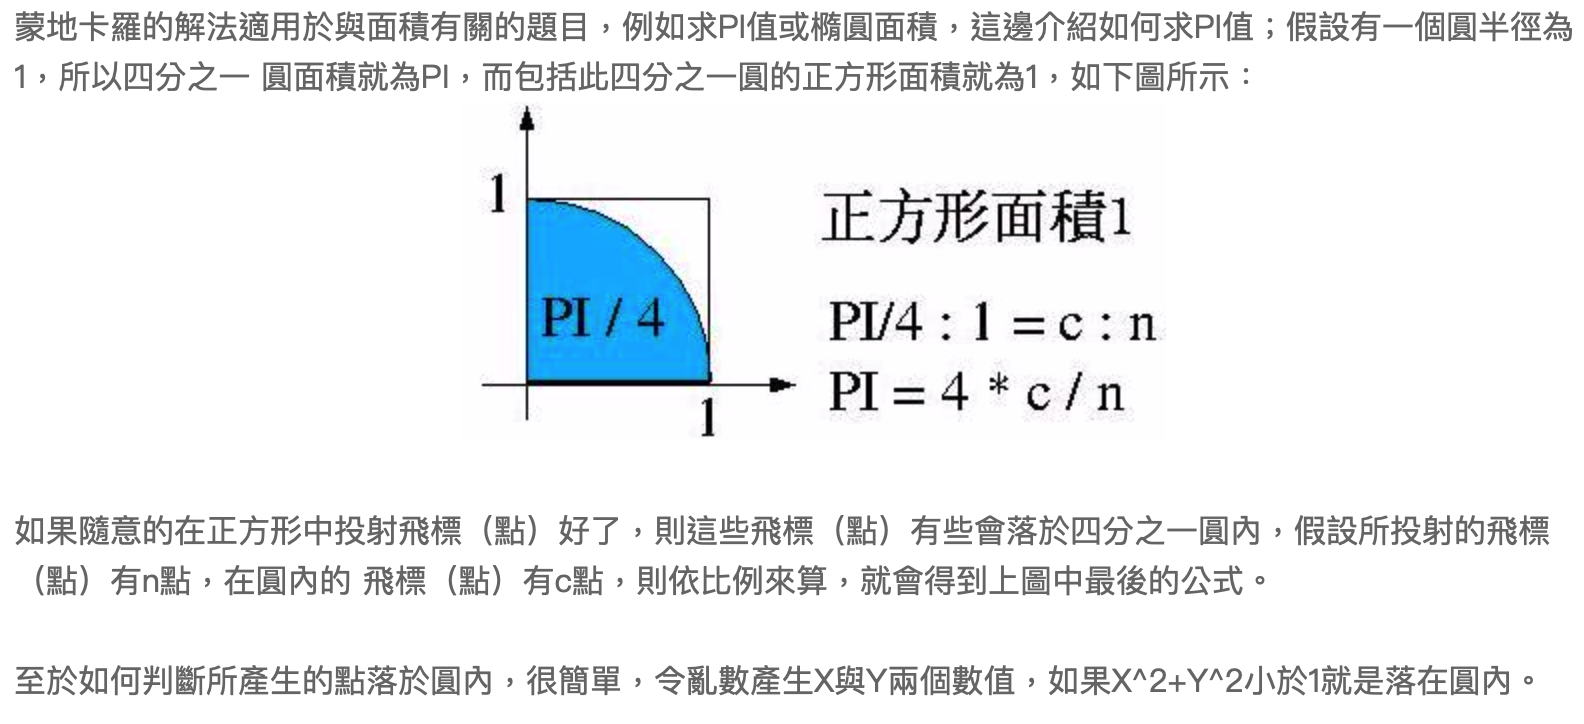

In [21]:
# Initialize sims and circle_points
sims, circle_points = 10000, 0 

for i in range(sims):
    # Generate the two coordinates of a point
    point = np.random.uniform(-1,1,2)
    # if the point lies within the unit circle, increment counter
    within_circle = point[0]**2 + point[1]**2 <= 1
    if within_circle == True:
        circle_points +=1
        
# Estimate pi as 4 times the avg number of points in the circle.
pi_sim = 4*(circle_points/sims)
print("Simulated value of pi = {}".format(pi_sim))

Simulated value of pi = 3.1416


## power analysis 

指當有 effect(有效果) 的時候，power 是偵測到這個 effect 的機率。可以換個方式說，power 是當事實上是要否定虛無假設，而拒絕虛無假設的機率 (it is the probability of rejecting the null hypothesis when it is in fact false)。再換個方式說，power 是避免錯誤接受虛無假設的機率。

In [25]:
import scipy.stats as st

In [26]:
sample_size = 50

control_mean,control_sd = 1, 0.5
sample_size = 50
sims = 1000
effect_size = 0.1

"""
一般來說都是以power = 0.8，如果碰到power=0.8，就會break
treatment_time_spent 表示了增加了effect_size之後
檢測是否顯著
"""
# Keep incrementing sample size by 10 till we reach required power
while 1:
    control_time_spent = np.random.normal(loc=control_mean, scale=control_sd, size=(sample_size,sims))
    treatment_time_spent = np.random.normal(loc=control_mean*(1+effect_size), scale=control_sd, size=(sample_size,sims))
    t, p = st.ttest_ind(treatment_time_spent, control_time_spent)
    
    # Power is the fraction of times in the simulation when the p-value was less than 0.05
    power = (p < 0.05).sum()/sims
    if power>0.8: 
        break
    else: 
        sample_size += 10
print("For 80% power, sample size required = {}".format(sample_size))

For 80% power, sample size required = 390
